In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
!nvidia-smi

Mon Aug 16 17:44:20 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P0    74W / 149W |    122MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.inception_resnet_v2 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [5]:
# re-size all the images to this
IMAGE_SIZE = [256, 128]

In [6]:
train_path = '/content/drive/MyDrive/BRAC /Past Courses/Thesis/Thesis Final/ResNET/Dataset/Train'

In [7]:
valid_path = '/content/drive/MyDrive/BRAC /Past Courses/Thesis/Thesis Final/ResNET/Dataset/Test'

In [8]:
# add preprocessing layer to the front of VGG

inception_resnet_v2 = InceptionResNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

219070464/219055592 [==============================] - 5s 0us/step


In [9]:
# don't train existing weights
for layer in inception_resnet_v2.layers:
  layer.trainable = False

In [10]:
  # useful for getting number of classes
folders = glob('/content/drive/MyDrive/BRAC /Past Courses/Thesis/Thesis Final/ResNET/Dataset/Train/*')

In [11]:
# our layers - you can add more if you want
x = Flatten()(inception_resnet_v2.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [12]:
# create a model object
model = Model(inputs=inception_resnet_v2.input, outputs=prediction)

In [13]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 127, 63, 32)  864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 127, 63, 32)  96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 127, 63, 32)  0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [14]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/BRAC /Past Courses/Thesis/Thesis Final/ResNET/Dataset/Train',
                                                 target_size = (256, 128),
                                                 batch_size = 5,
                                                 class_mode = 'categorical')


Found 270 images belonging to 2 classes.


In [17]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/BRAC /Past Courses/Thesis/Thesis Final/ResNET/Dataset/Test',
                                            target_size = (256, 128),
                                            batch_size = 5,
                                            class_mode = 'categorical')

Found 90 images belonging to 2 classes.


In [18]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/03/Test/Model')

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
54/54 [==============================] - 275s 4s/step - loss: 2.8668 - accuracy: 0.6221 - val_loss: 1.7250 - val_accuracy: 0.5556
Epoch 2/10
54/54 [==============================] - 7s 125ms/step - loss: 1.4163 - accuracy: 0.7051 - val_loss: 1.6477 - val_accuracy: 0.7556
Epoch 3/10
54/54 [==============================] - 7s 124ms/step - loss: 1.4433 - accuracy: 0.7365 - val_loss: 1.6416 - val_accuracy: 0.6889
Epoch 4/10
54/54 [==============================] - 7s 125ms/step - loss: 1.4227 - accuracy: 0.7693 - val_loss: 3.8789 - val_accuracy: 0.6667
Epoch 5/10
54/54 [==============================] - 7s 125ms/step - loss: 1.7297 - accuracy: 0.7776 - val_loss: 2.8488 - val_accuracy: 0.6778
Epoch 6/10
54/54 [==============================] - 7s 125ms/step - loss: 1.7004 - accuracy: 0.8083 - val_loss: 1.4033 - val_accuracy: 0.7667
Epoch 7/10
54/54 [==============================] - 7s 124ms/step - loss: 2.3095 - accuracy: 0.7229 - val_loss: 4.5620 - val_accuracy: 0.7222
Epoch 8

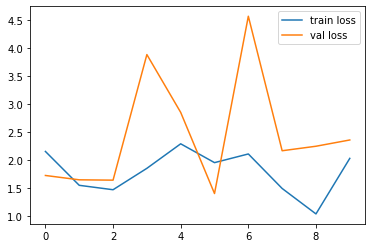

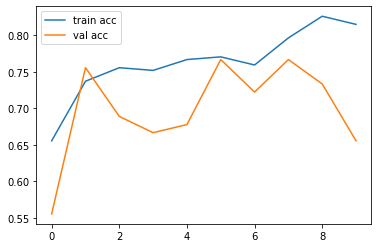

<Figure size 432x288 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')